Before we start working with the pulsar data, we want to simulated the pulsar data, try things out and automize whatever we can.

## Assignment 

Simulate a time series with gaussian noise with on it a pulsar signal.
pulsar signal with pulsar width and period, and certrain strength and form. Every pulsar has a characteristic form based on the geometry and the magnetosphere.: Pulse profile. Take it to be a Gaussian.


Then do a fourier transform on the data and try to find it back.


Develop a method so that you can find the pulse period back in the fourier transform.


Then cut the data, and stack it, folding.


Can be made harder by varying the strength of the pulse.


Later: pulsar simulating in a binary system.


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

## Initial trial

In [114]:
print( [i for i in range(10)] )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [115]:
noise = np.random.random_sample((100))
sin = [ np.sin(x) for x in range(100) ]
cos = [ np.cos(x) for x in range(100) ]

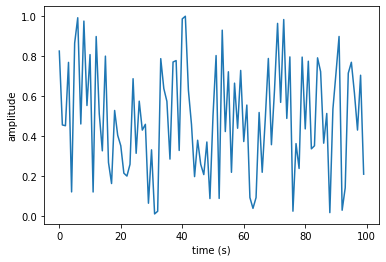

In [116]:
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.plot(noise)

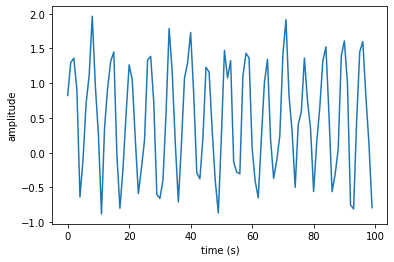

In [117]:
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.plot(noise + sin)

C:\Users\bvptr\anaconda3\envs\pulsar\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


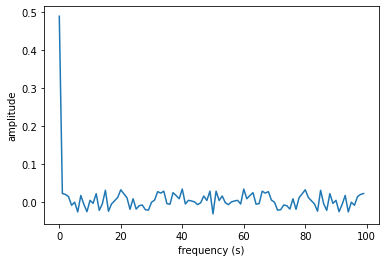

In [118]:
plt.xlabel('frequency (s)')
plt.ylabel('amplitude')
plt.plot(np.fft.fft(noise)/len(noise))

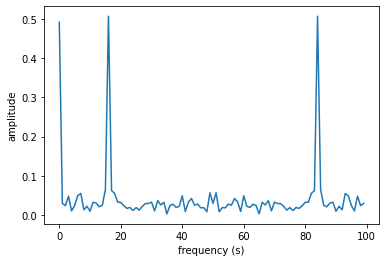

In [119]:
plt.xlabel('frequency (s)')
plt.ylabel('amplitude')
plt.plot(np.abs(np.fft.fft(noise + sin )/len(noise + sin)))

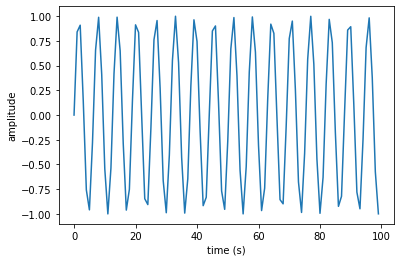

In [120]:
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.plot(sin)

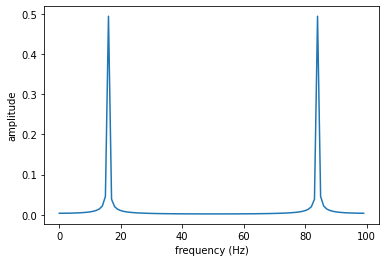

In [121]:
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.plot(np.abs(np.fft.fft(sin)/len(sin)))

C:\Users\bvptr\anaconda3\envs\pulsar\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


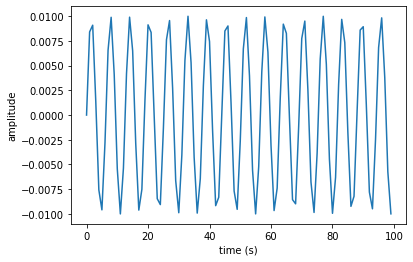

In [122]:
plt.ylabel('amplitude')
plt.xlabel("time (s)")
plt.plot(np.fft.ifft(np.fft.fft(sin)/len(sin)))

This is a different package. appears to work the same.

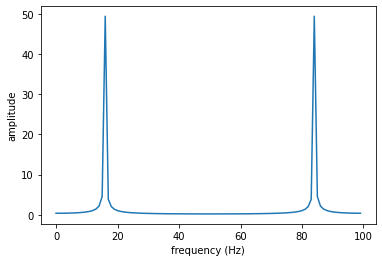

In [123]:
plt.ylabel('amplitude')
plt.xlabel('frequency (Hz)')
plt.plot(np.abs(scipy.fftpack.fft(sin)))

## Trial 2

In [124]:
noise = np.random.random_sample((100))

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
xvals = np.linspace(0.0, N*T, N)
sin = np.sin(50.0 * 2.0*np.pi*xvals)# + 0.5*np.sin(80.0 * 2.0*np.pi*x)
sin = sin
#cos = [ np.cos(x) for x in range(100) ]

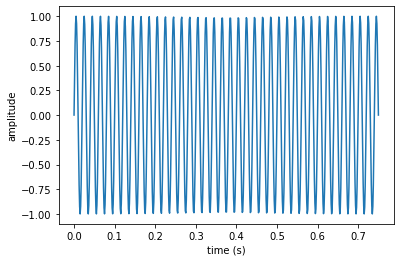

In [125]:
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.plot(xvals, sin)

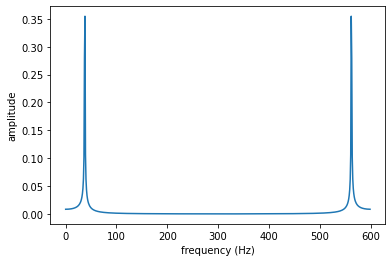

In [126]:
#plt.plot(np.fft.fft(sin)/len(sin))
plt.ylabel('amplitude')
plt.xlabel('frequency (Hz)')
plt.plot(abs(np.fft.fft(sin)/len(sin)))

## Trial 3

In [127]:
N = 100
interval = 1 / N

In [128]:
time = np.arange(0, 10, interval)

In [129]:
signal1Frequency = 4
signal2Frequency = 7

sin1 = np.sin(2*np.pi*signal1Frequency*time)
sin2 = np.sin(2*np.pi*signal2Frequency*time)

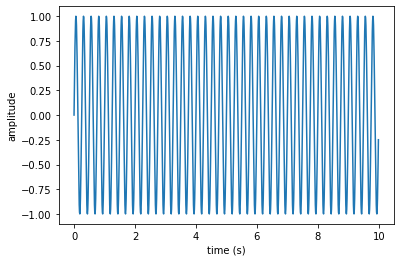

In [130]:
plt.ylabel('amplitude')
plt.xlabel('time (s)')
plt.plot(time, sin1)

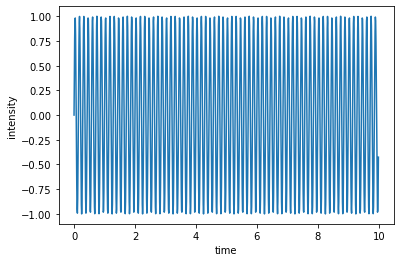

In [131]:
plt.ylabel('intensity')
plt.xlabel('time')
plt.plot(time, sin2)

In [132]:
transform1 = np.fft.fft(sin1)/len(sin1)
transform1 = transform1[range(int(len(sin1)/2))] # Exclude sampling frequency

In [133]:
time_count = len(time)
values = np.arange(int(time_count/2))
time_period = time_count / N
frequencies = values / time_period

In [134]:
print( len(transform1) )
print( len(frequencies) )

500
500


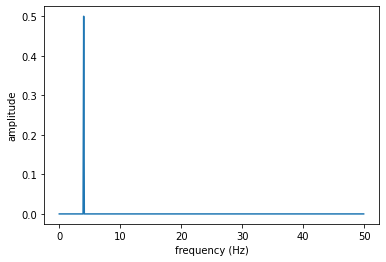

In [135]:
plt.ylabel('amplitude')
plt.xlabel('frequency (Hz)')
plt.plot(frequencies, np.abs(transform1))

## Trial 4
Noise with sin in it and with time. 

In [136]:
N = 100 # the sampling frequency 
interval = 1 / N # the sampling step size.
begin = 0
end = 11
time = np.arange(start=begin, stop=end, step=interval) # i.e. we have an (end - begin) long signal and sample every interval seconds.

In [137]:
#noise = np.random.random_sample(N * (end - begin))
noise = np.random.normal(mean := 0, stdev := 1, N * (end - begin) )

In [138]:
print(len(time))
print(len(noise))

1100
1100


sines

In [163]:
signal1Frequency = 10
sin1 = np.sin(2*np.pi*signal1Frequency*time)

In [140]:
#signal = noise + sin1
#signal = noise

Add many sines

In [141]:
signal = noise
for i in range(1, 6):
    freq = i * 10
    signal += np.sin(2*np.pi * freq *time)

do things to compute the frequency

In [194]:
time_count = len(time)
values = np.arange(int(time_count/2))
#values = np.arange(int(time_count))
time_period = time_count / N
frequencies = values / time_period

In [196]:
transform = np.fft.fft(signal)/len(signal)
transform = transform[range(int(len(signal)/2))] # Exclude sampling frequency
#transform = transform[range(int(len(signal)))] # Exclude sampling frequency

In [197]:
# TODO: Understand why the frequency domain has (should have?) halved length.
print(len(time))
print(len(frequencies))
print(len(transform))

1100
550
550


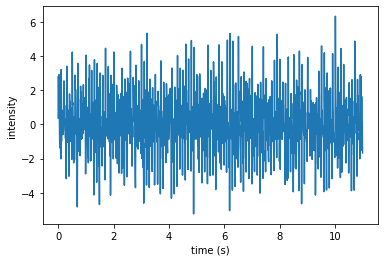

In [198]:
plt.ylabel('intensity')
plt.xlabel('time (s)')
plt.plot(time, signal)

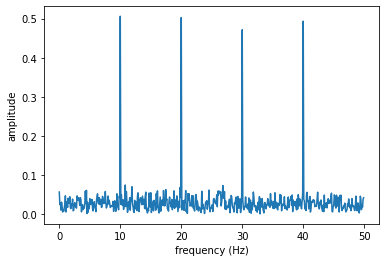

In [199]:
plt.ylabel('amplitude')
plt.xlabel('frequency (Hz)')
plt.plot(frequencies, np.abs(transform))

## Retrieving frequencies

skip ahead to np.fftfreq

In [147]:
# NOTE: Currently broken
def greatest_frequency_from_transform(frequencies, transform):
    index = list(transform).index(max(transform))
    return  frequencies[index]

try it another way

In [148]:
# NOTE: Also broken
from scipy.signal import argrelextrema
def get_frequenties_from_transform(transform):
    lst = list(transform)
    indices = [ lst.index(transform[x]) for x in argrelextrema(transform, np.greater)[0] ] 
    return [ frequencies[i] for i in indices ]

In [149]:
#print(get_frequenties_from_transform(transform))
#print( get_frequenties_from_transform(transform) ) 

let us use the built in way by numpy

but this returns negative frequencies 

[good source](https://stackoverflow.com/questions/3694918/how-to-extract-frequency-associated-with-fft-values-in-python#3695448)

In [150]:
fft_freqs = np.fft.fftfreq(len(signal))
for coef, freq in zip(transform, frequencies):
    if coef:
        pass
        #print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,f=freq))

but we want frequency in hertz.

frequency [Hz] = abs(fft_freq * frame_rate)

In [151]:
freq_in_hertz = np.abs(fft_freqs * N)

In [152]:
#print( [ x for x in freq_in_hertz ]  )

but is that the good array? Of course, its length is 1100, because we have 1100 coefficients $c_n$ associated with the fourier trasnform corresponding to the sampling rate.  But we are not interested in such frequenties; instead, we want to know the distinct peaks that we can see in the plot.

[this is exactly what we want](https://stackoverflow.com/a/70067213)

Obtain the size of a step in time.

In [168]:
dt = time[1] - time[0] # this can be done because the steps in time are constant
dt

0.01

In [172]:
n = time.size # the number of points in the data.
n != N # NOTE

True

obtain frequenties

In [155]:
fft_freqs = np.fft.fftfreq(n, d=dt)

Let's find the peaks with height_threshold >=0.05

Note: We use the magnitude (i.e the absolute value) of the Fourier transform

In [173]:
height_threshold=0.05

In [174]:
from scipy.signal import find_peaks
peaks_index, properties = find_peaks(np.abs(transform), height=height_threshold)

In [175]:
print(len(fft_freqs))
print(len(fft_freqs[peaks_index]))
print(len(properties['peak_heights']))

1100
40
40


Text(0, 0.5, 'Amplitude')

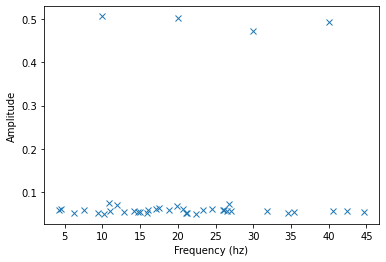

In [176]:
#plt.plot(fft_freqs, np.abs(transform),'-', fft_freqs[peaks_index],properties['peak_heights'],'x')
plt.plot(fft_freqs[peaks_index],properties['peak_heights'],'x')
plt.xlabel("Frequency (hz)")
plt.ylabel("Amplitude")

I was following stack above. But what it seems to me is that we don't need fftfreq at all.

This threshold needs to be set properly depending on the data.

In [177]:
height_threshold=0.4

In this case, properties will contain only one property: 'peak_heights' for each element.

In [178]:
peaks_index, properties = find_peaks(np.abs(transform), height=height_threshold)

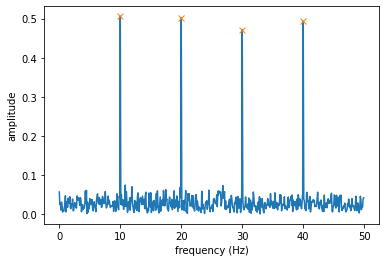

In [179]:
plt.ylabel('amplitude')
plt.xlabel('frequency (Hz)')
plt.plot(frequencies, np.abs(transform),'-', frequencies[peaks_index],properties['peak_heights'],'x')